In [470]:
from pathlib import Path 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from collections import OrderedDict
import sys
import os
import seaborn as sns
import researchpy as rp
import statsmodels.formula.api as smf
import scipy.stats as stats
import warnings

from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.ticker as ticker
from sklearn.cluster import KMeans

#sys.path.append('/Users/alina/Desktop/MIT/code/ADHD/MTA/helper')
from helper import rr, prep, var_dict

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [471]:
#health01.txt
#health = pd.read_csv(Path(data_root, 'health01.txt'), usecols=np.concatenate([comorb_odd_cd_health, prev_med_vars_health01]), delimiter='/t')
#health = prep.get_data(Path(data_root,'health01.txt' ), columns=[comorb_odd_cd_health, prev_med_vars_health01], set_dtypes=False,version_form=False, split_timepoints=False, treat_group=trt_names)
#scid01.txt
#diagpsx01.txt
# diagpsx_p401
#'diagpsx701.txt'
#debrief01.txt
#demgr01.txt
#cisp_p01.txt 
#pcrc01.txt'

In [472]:
if Path('/Volumes/Samsung_T5/MIT/mta').exists():
    data_root =     '/Volumes/Samsung_T5/MIT/mta'
    data_derived = '/Volumes/Samsung_T5/MIT/mta/output/derived_data'
else: 
    data_root = '/Users/alina/Desktop/MIT/code/data'
    data_derived = '/Users/alina/Desktop/MIT/code/data/output/derived_data'
    
save_path = '/Users/alina/Desktop/MIT/code/data/output/figures/scatter_time'

In [473]:
baseline_var = ['src_subject_id', 'interview_date', 'interview_age', 'sex', 'site', 'days_baseline']
dtypes_baseline = { 'src_subject_id' : 'str',
                    'interview_date': 'str' , 
                    'interview_age' : 'int64' ,
                    'sex' : 'str', 
                    'site' : 'int64' ,
                    'days_baseline':  'int64',
                    'version_form': 'str'}

version_form = ['version_form']

use_L_group = False

In [474]:
baseline_var

['src_subject_id',
 'interview_date',
 'interview_age',
 'sex',
 'site',
 'days_baseline']

In [475]:

snap_file = 'snap01.txt'
ssrs_file = 'ssrs01.txt'
masc_file = 'masc_p01.txt'
parent_child_file = 'pcrc01.txt'
wechsler_file = 'wiat_iiip201.txt'
treat_group_file = 'treatment_groups.csv'

In [476]:
# snap = pd.read_csv(Path(data_root, snap_file), delimiter='\t')
# ssrs = pd.read_csv(Path(data_root, ssrs_file), delimiter='\t')
# masc = pd.read_csv(Path(data_root, masc_file), delimiter='\t')
# pc = pd.read_csv(Path(data_root, parent_child_file), delimiter='\t')
# wechsler = pd.read_csv(Path(data_root, wechsler_file), delimiter='\t')

trt_names = pd.read_csv(Path(data_derived, treat_group_file))


In [477]:
baseline_var

['src_subject_id',
 'interview_date',
 'interview_age',
 'sex',
 'site',
 'days_baseline']

In [478]:
#snap
excellent_resp_var = ['snaxrsp'] # SNAP Adolescent Excellent Responder Score ]
inattention_vars = [ 
'snainatx', #Inattention (mean score) 
#"snainatt", # Inattention (total score) 
"snahypax"]# Hyperactivity (mean score) 
#"snahypat",] #Hyperactivity (total score) ]
#snap
hyperact_vars = [# Sum of hyperactivity/impulsivity items 
'snahix'] #Hyperactive/Impulsive (mean score)
#'snahit']# Hyperactive/Impulsive (total score) ]
#snap
odd_vars = ['snaoddx'] # ODD (mean score) 
#'snaoddt' ]# ODD (total score) ]

snap_vars =  np.concatenate((excellent_resp_var, inattention_vars, hyperact_vars, odd_vars))
snap = prep.get_data(Path(data_root, snap_file), treat_group= trt_names,  columns=[baseline_var, snap_vars], version_form=True, set_dtypes=True)


Success


In [479]:
snap.shape

(14392, 13)

In [480]:
masc_file = 'masc_p01.txt'
masc_vars = ['masc_masctotalt']

masc = prep.get_data(Path(data_root, masc_file), treat_group= trt_names,  columns=[baseline_var, masc_vars], version_form=False, set_dtypes=True)


Success


In [481]:
masc.columns

Index(['src_subject_id', 'interview_date', 'interview_age', 'sex',
       'masc_masctotalt', 'days_baseline', 'site', 'trtname'],
      dtype='object')

In [482]:
print(baseline_var)

['src_subject_id', 'interview_date', 'interview_age', 'sex', 'site', 'days_baseline']


In [483]:
pc_file = 'pcrc01.txt'
pc_vars = ['pcrcpax', # Quarreling, Dominance, Physical Punishment, Deprivation of Privileges, Verbal Punishment & Guilt Induction (mean score) 
           'pcrcprx'] # Pro-social, Similarity, Intimacy, Nurturance & Companionship (mean score) 
pc = prep.get_data(Path(data_root, pc_file), treat_group= trt_names,  columns=[baseline_var, pc_vars], version_form=False, set_dtypes=True)



Success


pc.shape

In [484]:
#ssrs
ss_vars = ['sspsconx' ,#Social Conduct raw score 
'ssptossx'] #Total social skills mean score ]
int_vars = ['sspintx']# Internalizing behavior mean score ]
ssrs_vars = np.concatenate((ss_vars, int_vars))

ssrs = prep.get_data(Path(data_root, ssrs_file), treat_group= trt_names,  columns=[baseline_var, ssrs_vars], version_form=True, set_dtypes=True)


Success


In [485]:
print(baseline_var)

['src_subject_id', 'interview_date', 'interview_age', 'sex', 'site', 'days_baseline']


In [486]:
wechsler_file = 'wiat_iiip201.txt'
wechsler_vars = ['w1readb','w2math','w3spell' ]

print([baseline_var, wechsler_vars])

[['src_subject_id', 'interview_date', 'interview_age', 'sex', 'site', 'days_baseline'], ['w1readb', 'w2math', 'w3spell']]


In [487]:

wechsler = prep.get_data(Path(data_root, wechsler_file), treat_group= trt_names,  columns=[baseline_var, wechsler_vars], version_form=False, set_dtypes=True)


Success


In [488]:
wechsler_vars

['w1readb', 'w2math', 'w3spell']

In [489]:
qsts =['snap', 'ssrs', 'masc', 'pc', 'wechsler']
data_dict = dict(zip(qsts, [snap, ssrs, masc, pc, wechsler]))

outcomes = np.concatenate((snap_vars, ssrs_vars, masc_vars, pc_vars, wechsler_vars))

#outcome variables 
outcomes_written = ['SNAP Excellent responder score', 'SNAP Inattention', 'SNAP Hyperactivity', 'SNAP Hyperactivity-Impulsivity','SNAP Aggressive',
                    'SSRS Social Conduct (raw score)', 'SSRS Social Skills', 'SSRS Internalizing', 
                    'MASC total Score', 
                    'Parent-Child Power Assertion', 'Parent-Child Personal Closeness',
                    'Wechsler Reading Scaled Score', 'Wechsler Mathematics Scaled Score', 'Wechsler Spelling Scaled Score']
outcomes_dict_fig = dict(zip(outcomes, outcomes_written))
outcomes_dict_fig

if use_L_group == False:
    for qst in data_dict.keys():
        data_dict[qst] = data_dict[qst][data_dict[qst]['trtname'] != 'L']
    
    


In [490]:
outcomes_dict_fig

{'snaxrsp': 'SNAP Excellent responder score',
 'snainatx': 'SNAP Inattention',
 'snahypax': 'SNAP Hyperactivity',
 'snahix': 'SNAP Hyperactivity-Impulsivity',
 'snaoddx': 'SNAP Aggressive',
 'sspsconx': 'SSRS Social Conduct (raw score)',
 'ssptossx': 'SSRS Social Skills',
 'sspintx': 'SSRS Internalizing',
 'masc_masctotalt': 'MASC total Score',
 'pcrcpax': 'Parent-Child Power Assertion',
 'pcrcprx': 'Parent-Child Personal Closeness',
 'w1readb': 'Wechsler Reading Scaled Score',
 'w2math': 'Wechsler Mathematics Scaled Score',
 'w3spell': 'Wechsler Spelling Scaled Score'}

In [491]:
data_dict['snap']

,src_subject_id,interview_date,interview_age,sex,snainatx,snahypax,snaoddx,snahix,snaxrsp,days_baseline,site,version_form,trtname
6,P1002,1997-05-02,155,M,2.00,1.17,1.63,1.56,0.0,-32,1,Parent,C
7,P1002,1997-06-03,120,M,1.00,0.50,1.25,0.78,1.0,0,1,Parent,C
8,P1002,1997-06-03,120,M,1.11,1.00,0.88,1.00,1.0,0,1,Parent,C
9,P1002,1997-09-19,124,M,0.33,0.33,0.63,0.44,1.0,108,1,Parent,C
10,P1002,1998-01-03,127,M,0.44,0.17,0.13,0.44,1.0,214,1,Parent,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14398,P1844,1995-04-24,72,M,3.00,2.33,1.38,2.44,0.0,0,4,Teacher,A
14399,P1844,1995-10-04,77,M,2.11,1.00,0.13,1.00,0.0,163,4,Teacher,A
14400,P1844,1996-04-05,84,M,3.00,1.50,0.38,1.44,0.0,347,4,Teacher,A
14401,P1844,1997-03-26,95,M,1.89,1.17,1.25,1.11,0.0,702,4,Teacher,A


In [492]:
def scatter_per_subject(df, var, days_baseline = None, outcomes_dict_fig = outcomes_dict_fig, groupby = 'src_subject_id', x_axis_type = 'days', n_subjects = None, cutoffs = None, plot_L = False, save_path = None):
    
    if days_baseline is not None : 
        if isinstance(days_baseline, int):
            df = df[df['days_baseline'] < days_baseline]
        elif isinstance(days_baseline, (list, tuple, np.ndarray)):
            df = df[ (df['days_baseline'] > days_baseline[0]) & (df['days_baseline']< days_baseline[1])]
            
    if plot_L == False:
        df = df[df['trtname'] != 'L']
    
    groups = df.groupby(groupby)
        # Optionally limit the number of subjects to plot
    if n_subjects is not None:
        # Select only the first n_subjects groups
        groups = list(groups)[:n_subjects]

    plt.figure(figsize=(10, 6))

    # Plot each subject's data in a different color
    for name, group in groups:
        if x_axis_type == 'months':
            # Convert days to months by dividing by 30
            plt.scatter(group['days_baseline'] / 30, group[var], label=name + ', n = ' + str(group['src_subject_id'].unique().shape[0]))
        else:
            # Use days as is
            plt.scatter(group['days_baseline'], group[var], label=name+ ', n = ' +str(group['src_subject_id'].unique().shape[0]))

    # Set axis labels
    plt.ylabel(var.upper())

    if x_axis_type == 'days':
        plt.xlabel('Days Since Baseline')
        plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(50))  # Set major ticks every 200 days
    elif x_axis_type == 'months':
        plt.xlabel('Months Since Baseline')
        plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # Set major ticks every 1 month
  
  
    if cutoffs is not None :
        for cutoff in cutoffs:
            plt.axvline(x=cutoff[1], color='r', linestyle='--')
    # Add labels and a legend

    plt.ylabel(var.upper())
    plt.tight_layout()
    
    if groupby == 'trtname':
        plt.legend(title='Treatment arm', bbox_to_anchor=(1.05, 1), loc='upper left')
    # Show the plot
    groupby_dict = {'trtname' : 'Treatment arm', 
                     'src_subject_id' : 'Subjects'}
    plt.title(outcomes_dict_fig[var] + ' Assessements Over Time')
    if save_path is not None:
        plt.savefig(Path(save_path ,  'scattered_' + var + '_gb_' + groupby + '.png'))
    plt.show()
    


/var/folders/hf/frc4nxb532j7gqr3_36l6kmh0000gn/T/ipykernel_2977/2644977295.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby(groupby)


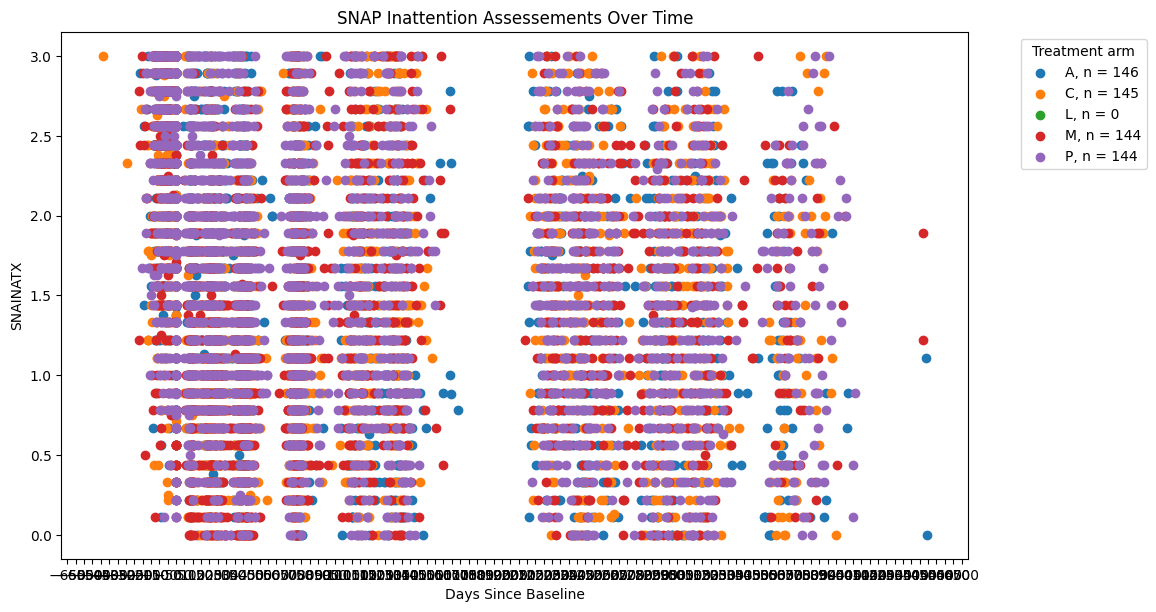

In [493]:
scatter_per_subject(snap,'snainatx' , days_baseline= None,outcomes_dict_fig= outcomes_dict_fig, groupby='trtname', x_axis_type='days')#, save_path=save_path)

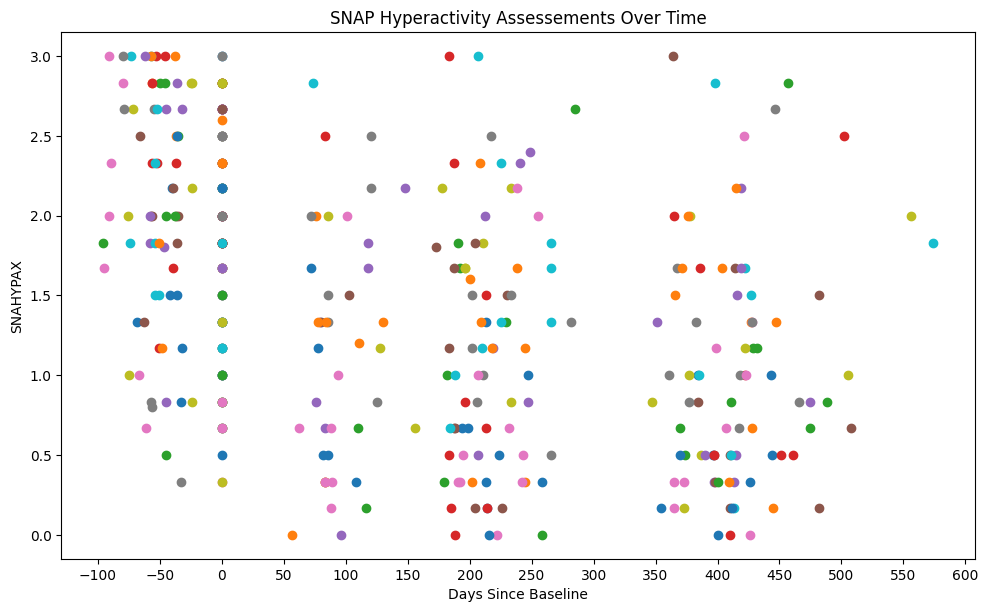

In [494]:

scatter_per_subject(snap,"snahypax" , days_baseline= [-100, 600], outcomes_dict_fig= outcomes_dict_fig,groupby='src_subject_id', x_axis_type='days', n_subjects=40)

### Cluster days_baseline

In [495]:
all_days = [df['days_baseline'][df['days_baseline'] < 500].astype(int) for df in data_dict.values()]

all_days = np.concatenate(all_days).reshape(-1,1)
all_days.shape

(19658, 1)

In [496]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(all_days)

# Get the labels (cluster assignments for each point)
labels = kmeans.labels_

# Initialize an empty list to store cluster boundaries
cluster_boundaries = []

# Loop through each cluster and calculate min and max days_baseline values
for cluster in np.unique(labels):
    cluster_points = all_days[labels == cluster]
    cluster_boundaries.append((cluster_points.min(), cluster_points.max()))

# Sort the cluster boundaries for interpretation
cluster_boundaries = sorted(cluster_boundaries)

# Output the cluster boundaries
print("Cluster boundaries (cutoff values):", cluster_boundaries)


Cluster boundaries (cutoff values): [(-440, 46), (49, 167), (168, 318), (319, 499)]


In [497]:
outcomes

array(['snaxrsp', 'snainatx', 'snahypax', 'snahix', 'snaoddx', 'sspsconx',
       'ssptossx', 'sspintx', 'masc_masctotalt', 'pcrcpax', 'pcrcprx',
       'w1readb', 'w2math', 'w3spell'], dtype='<U15')

/var/folders/hf/frc4nxb532j7gqr3_36l6kmh0000gn/T/ipykernel_2977/2644977295.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby(groupby)


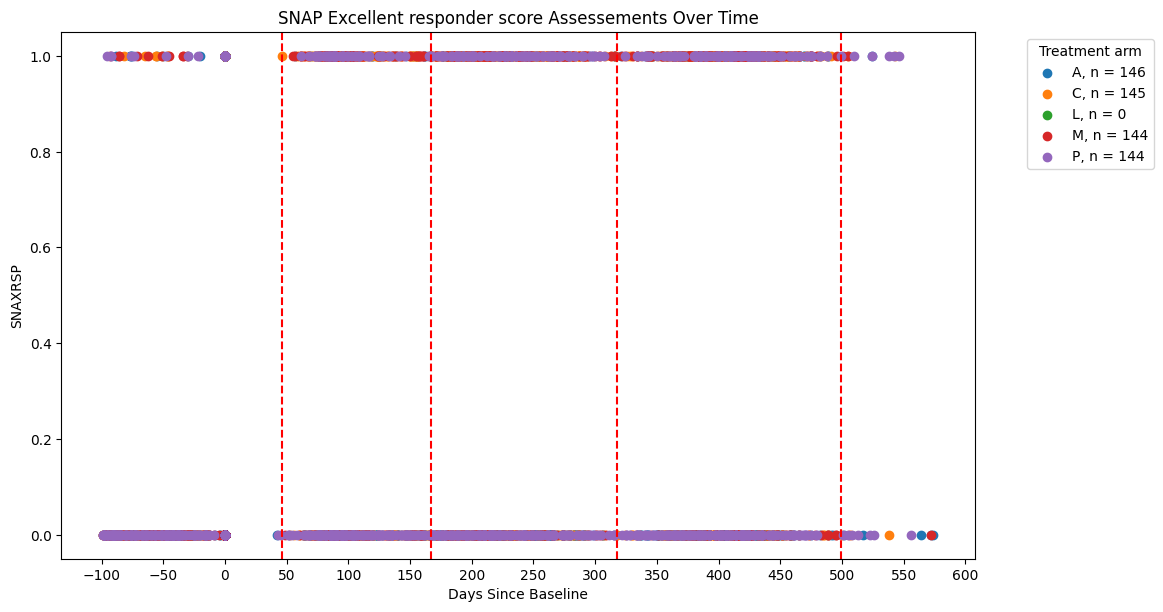

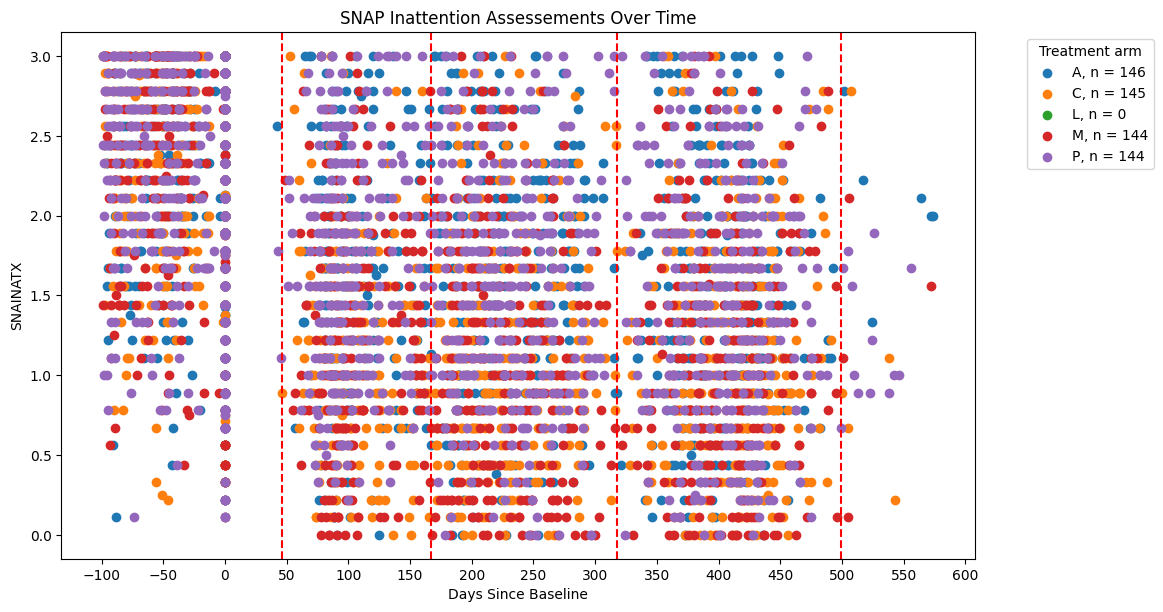

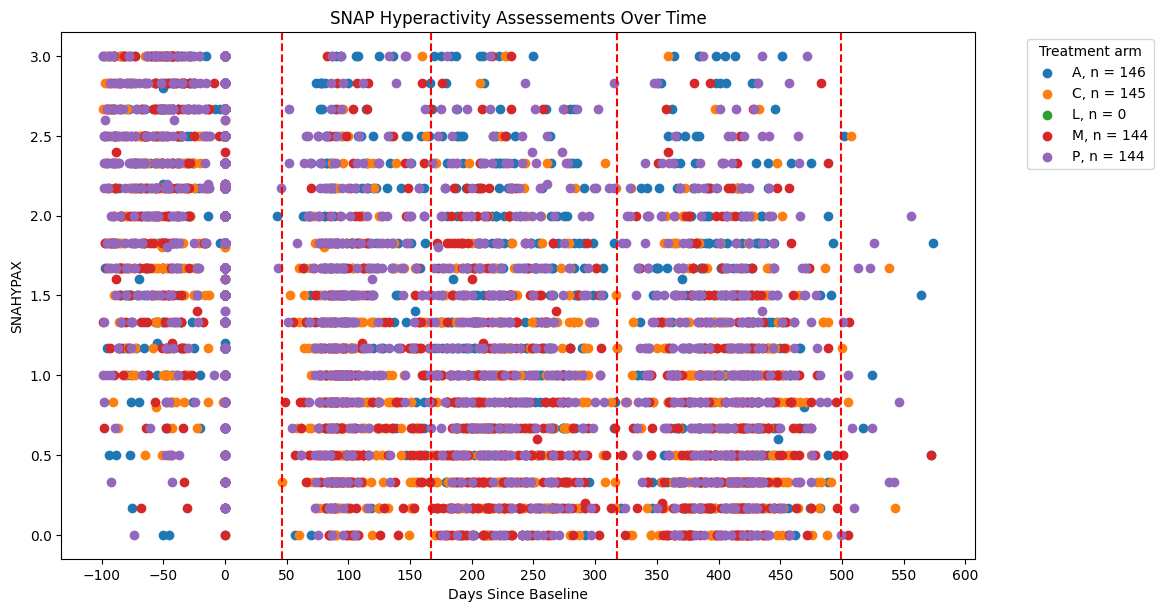

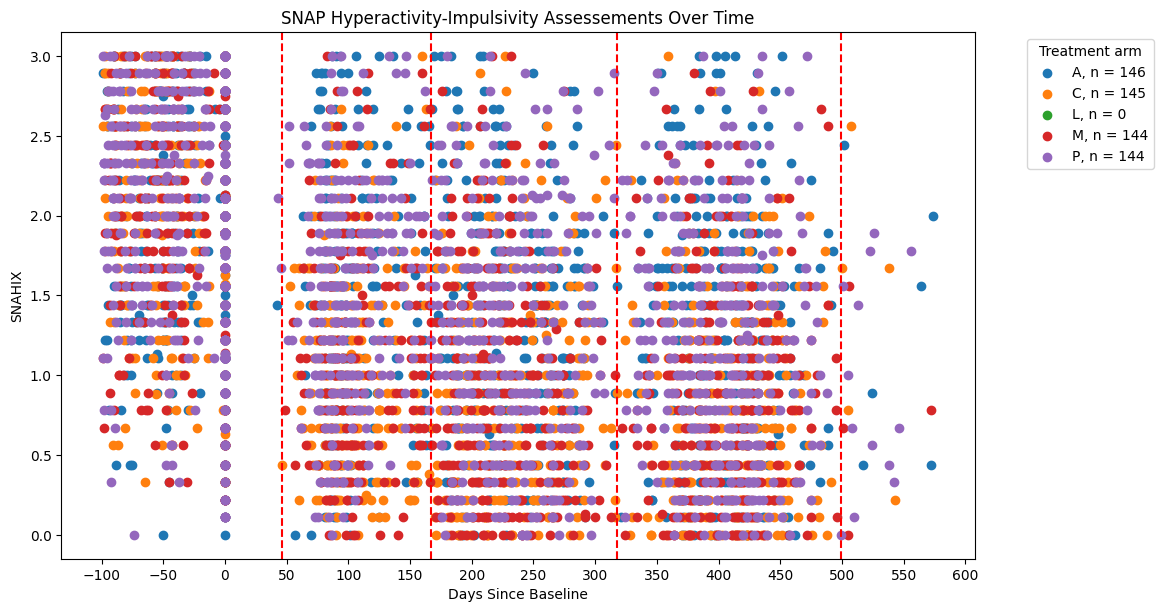

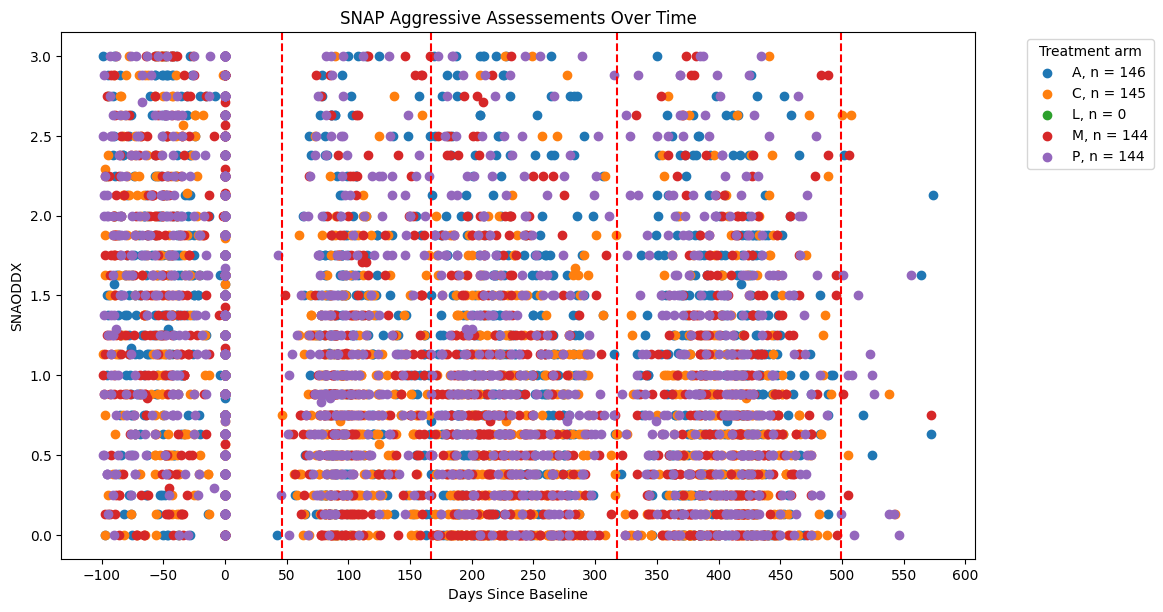

In [498]:
for var in snap_vars:
    scatter_per_subject(snap,var , days_baseline= [-100, 600],outcomes_dict_fig= outcomes_dict_fig, groupby='trtname', x_axis_type='days',n_subjects=5, cutoffs=cluster_boundaries, plot_L=use_L_group, save_path=save_path)

/var/folders/hf/frc4nxb532j7gqr3_36l6kmh0000gn/T/ipykernel_2977/2644977295.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby(groupby)


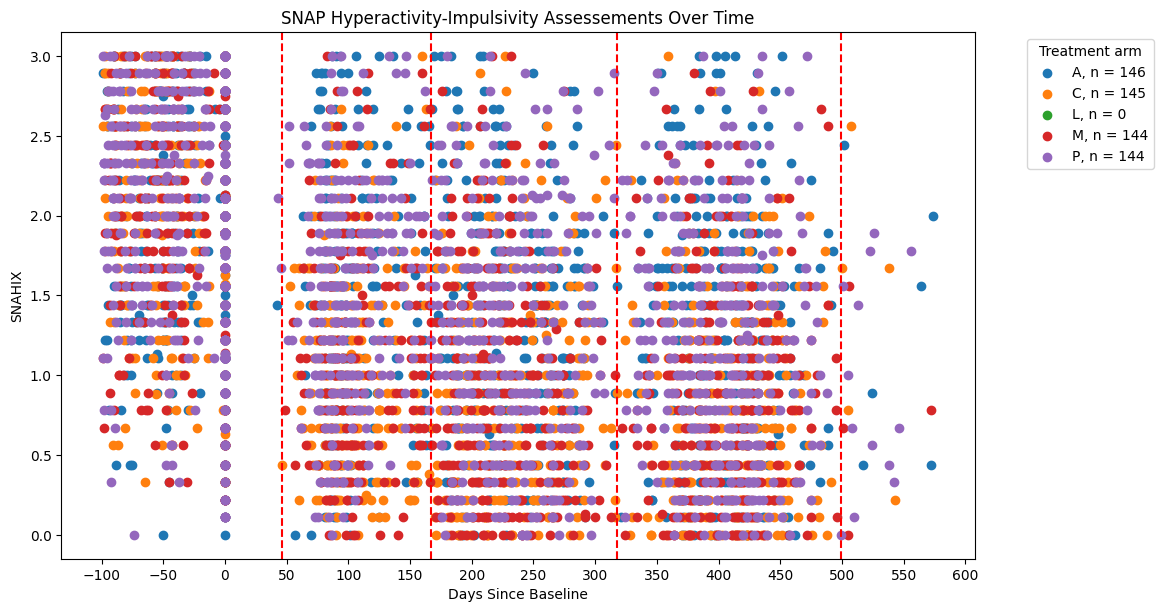

In [499]:
scatter_per_subject(snap,'snahix' , days_baseline= [-100, 600], groupby='trtname', x_axis_type='days',n_subjects=5, cutoffs=cluster_boundaries, save_path=save_path)

/var/folders/hf/frc4nxb532j7gqr3_36l6kmh0000gn/T/ipykernel_2977/2644977295.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby(groupby)


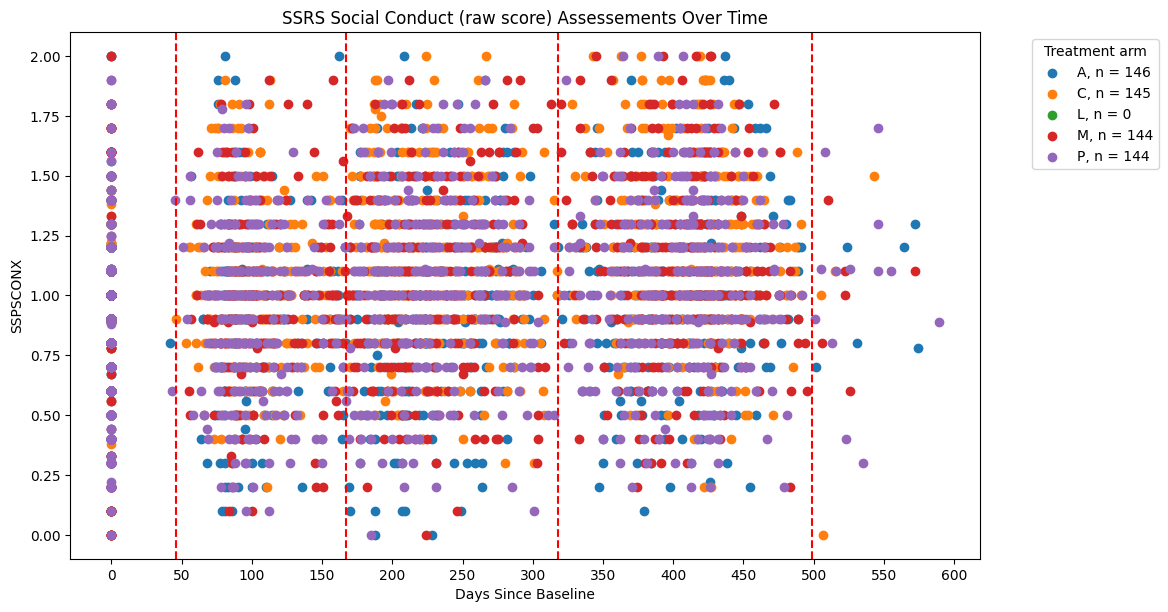

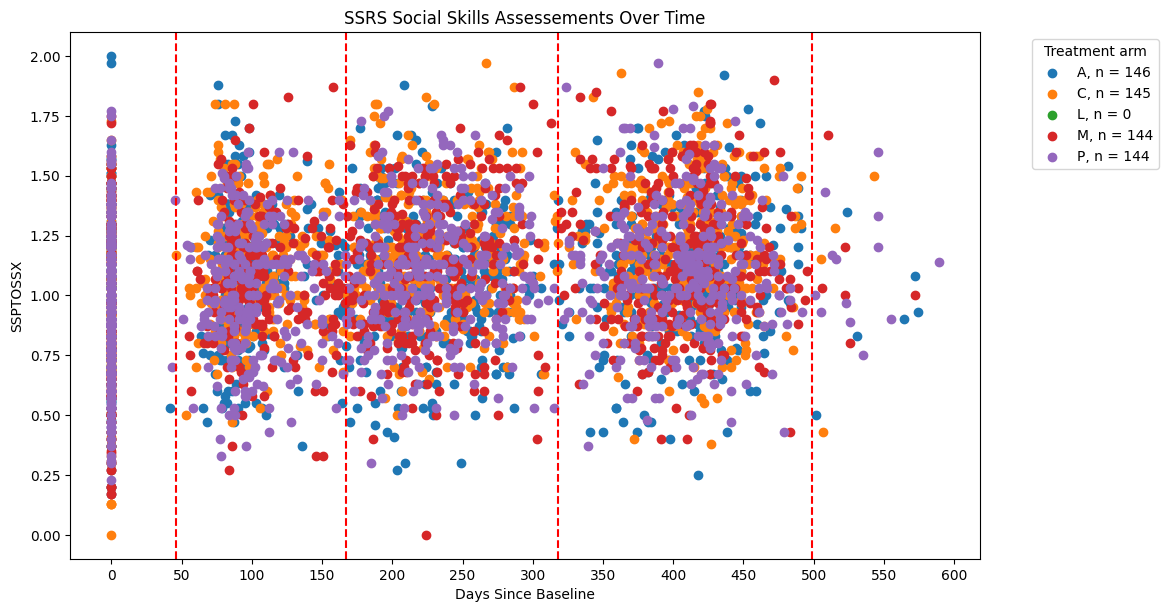

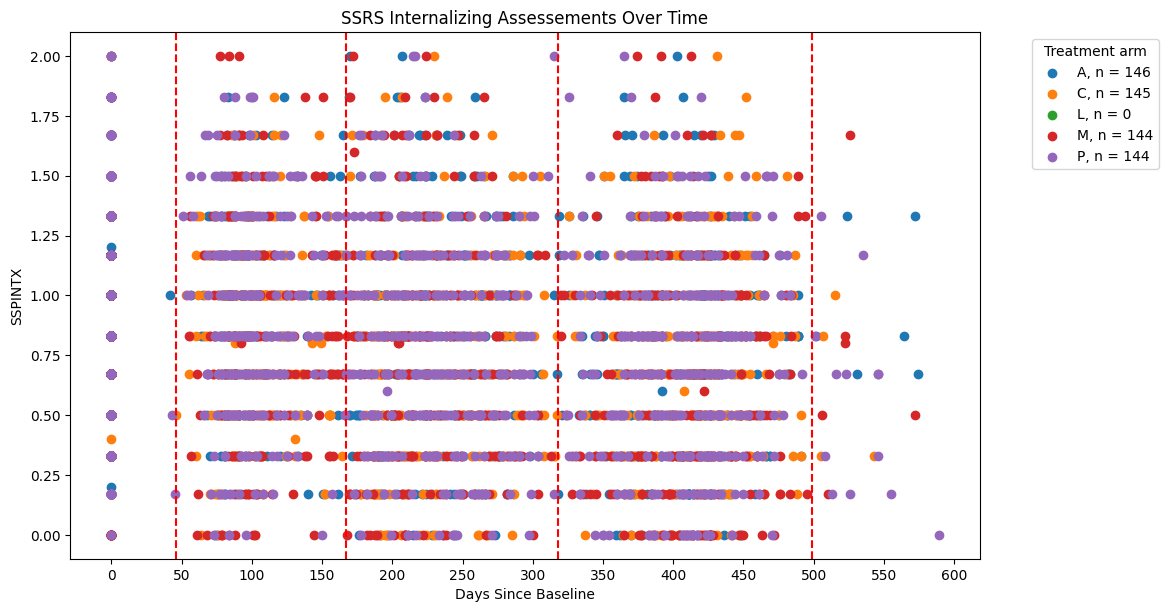

In [500]:
for var in ssrs_vars:
    scatter_per_subject(ssrs,var , days_baseline= [-100, 600], groupby='trtname', x_axis_type='days', cutoffs=cluster_boundaries, save_path=save_path)

/var/folders/hf/frc4nxb532j7gqr3_36l6kmh0000gn/T/ipykernel_2977/2644977295.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby(groupby)


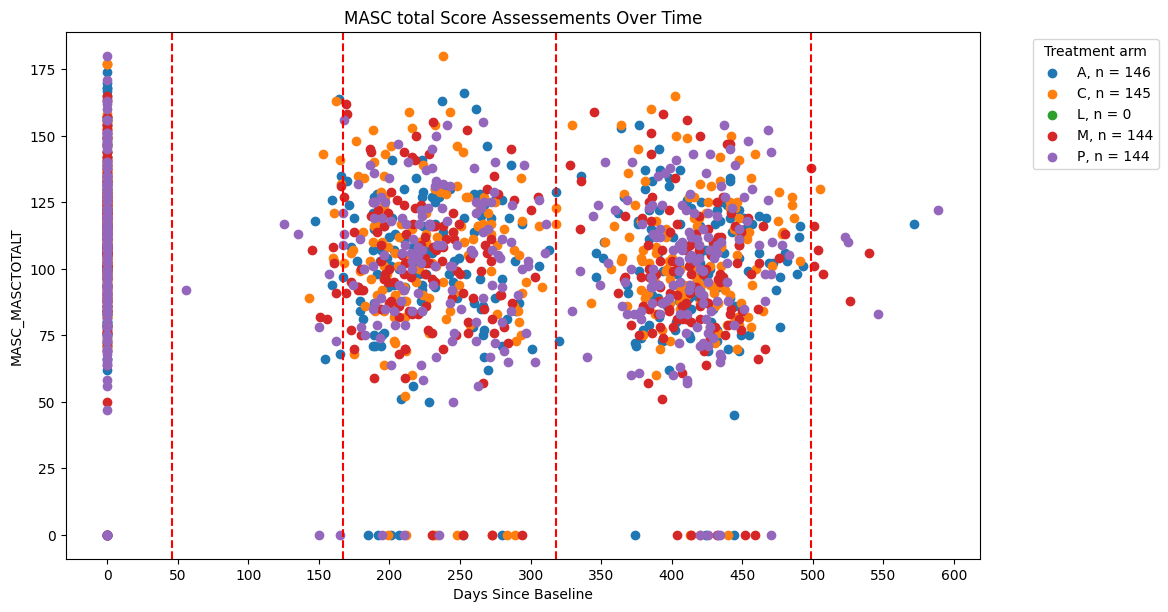

In [501]:
scatter_per_subject(masc,masc_vars[0] , days_baseline= [-100, 600], groupby='trtname', x_axis_type='days', cutoffs=cluster_boundaries)

/var/folders/hf/frc4nxb532j7gqr3_36l6kmh0000gn/T/ipykernel_2977/2644977295.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby(groupby)


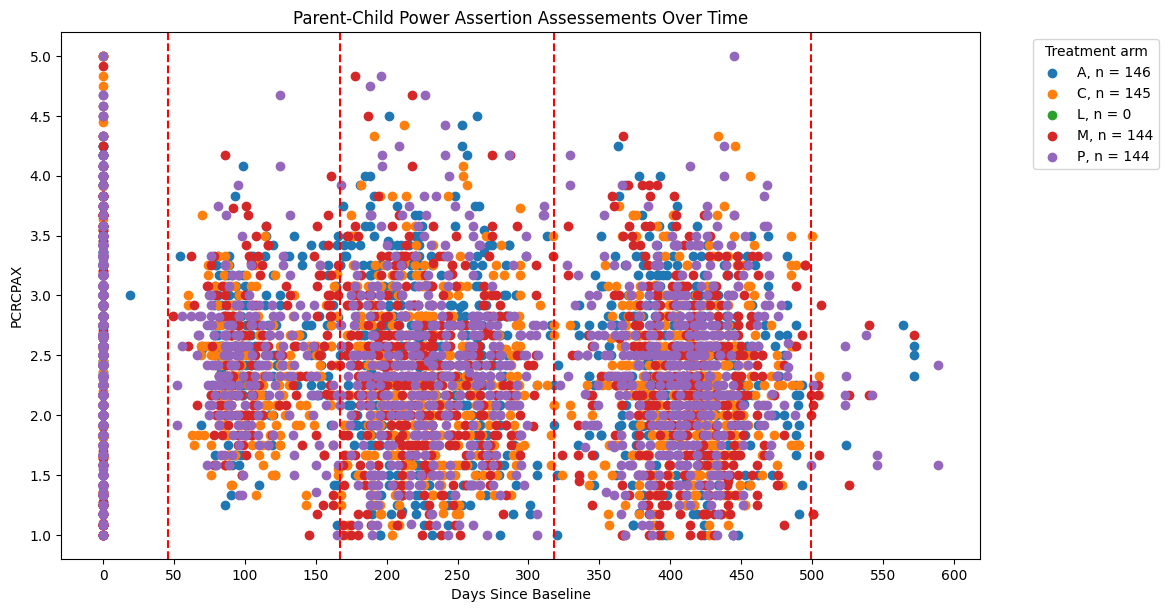

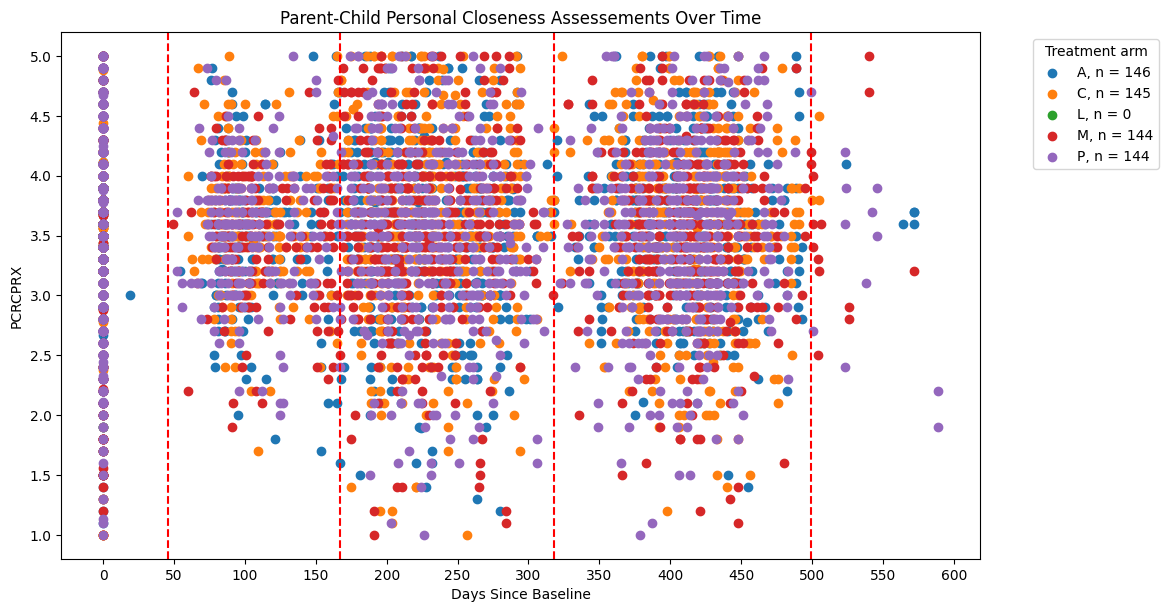

In [502]:
for var in pc_vars:
    scatter_per_subject(pc,var , days_baseline= [-100, 600], groupby='trtname', x_axis_type='days',n_subjects=5, cutoffs=cluster_boundaries, save_path=save_path)

### PLOT inattention 

In [503]:
#health01.txt
prev_med_vars_health01 = ['hi_24' ,# Have you ever taken ADHD medication? 
'hi_20d',# Past two years - diagnosis or treatment. Stimulants or Amphetamines 
'hi_30' ]#How many times in the past two years have you gotten a new or refill prescription for ADHD or any other mental health reason (depression, stress, worries, temper outbursts, substance use problems, etc.)? ]

In [504]:
#scid01.txt
prev_med_vars_sci = ['q073_stim_life',# Stimulants Lifetime Prevalence 
'q074_stim_mon',# Stimulants Past Month 
'susti' ]#Stimulants 

In [505]:
#health01.txt
comorb_odd_cd_health = [ 'hi_17b', # Past two years - diagnosis or treatment. Oppositional Defiant Disorder 
'hi_17d']# Past two years - diagnosis or treatment. Conduct Disorder ']

In [506]:
#diagpsx01.txt
comorb_odd_cd_diags1 =['cdorodd',# Does the child meet criteria for either Conduct Disorder (PCONDIS) OR Oppositional Defiant Disorder 
'pcondis',# Conduct disorder with impairment 
'podd']# Oppositional defiant disorder with impairment
# diagpsx_p401
comorb_odd_cd_diags4 = [
'op4', # OPPOSITIONAL DEFIANT DISORDER. The DSM-IV diagnosis for OPPOSITIONAL DISORDER 
'cd4']# CONDUCT DISORDER.  The DSM-IV diagnosis for CONDUCT DISORDER ]

In [507]:
#'diagpsx701.txt'
comorb_odd_cd_diags7 = ['dx20 Module E: Disruptive Behavior Disorders - Oppositional Defiant Disorder (ODD).',# pod 
'podm' , #Module E: Disruptive Behavior Disorders - Oppositional Defiant Disorder (ODD).', # past month: diagnosis for ODD 
'dx19' ]#Module E: Disruptive Behavior Disorders - Conduct Disorder (CD). pcd 


In [508]:
comorb_anx_diags1 = ['pso' ,# Social phobia 
 'psoi', # Social phobia with impairment 
'pag', # Agoraphobia 
'pagi' , #Agoraphobia with impairment 
'ppa', # Panic disorder 
'ppai', # Panic disorder with impairment 
'pga', # Generalized anxiety disorder (
'pgai', # Generalized anxiety disorder with impairment 
'poa', # Overanxious disorder 
'poai'] #Overanxious disorder with impairment ]

In [509]:
comorb_anx_diags4 = ['ag4crt', #AGORAPHOBIA. 
'pd4crt', # PANIC DISORDER. 
'agn4crt', # AGORAPHOBIA. 
'sp4crt', # SPECIFIC PHOBIA. 
'so4crt', # SOCIAL PHOBIA. 
'ga4crt'# GENERALIZED ANXIETY DISORDER. 
]

In [510]:
#debrief01.txt
acc_accept_vars = ['d2dresp', # Which of the following choices best describes the responses of the parent(s) to randomization? 
'd2dliki']# Which of the following reflects your judgment about the likelihood of this family adhering to the protocol and remaining committed to the study? ]
#demgr01.txt
assist_vars = ['demo61'] # Does any part of your annual household income come from public assistance? ]

In [511]:
# columnbia impairement scale 
#cisp_p01.txt 
cis = ['cisp13x' , #Total score of items 1-13 mean score 
'cisp13t']# Total score of items 1-13 total score (3986,)]

In [512]:
#pcrc01.txt'
pc_vars = ['pcrcpax', # Quarreling, Dominance, Physical Punishment, Deprivation of Privileges, Verbal Punishment & Guilt Induction (mean score) 
'pcrcprx']# Pro-social, Similarity, Intimacy, Nurturance & Companionship (mean score) 
